In [13]:
import numpy as np
import matplotlib.pyplot as plt

import keras

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

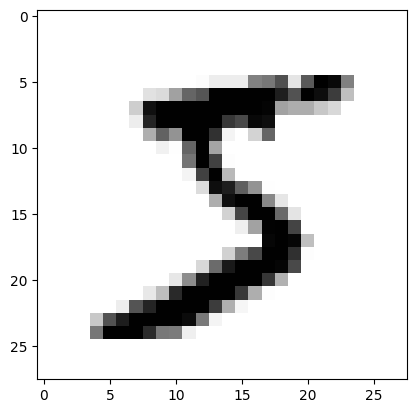

In [15]:
plt.imshow(x_train[0], cmap='binary')

In [16]:
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [17]:
x_train.shape

(60000, 28, 28, 1)

In [18]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape =(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)

mc = ModelCheckpoint('./bestmodel.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

cb = [es, mc]

In [21]:
his = model.fit(x_train, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9328 - loss: 0.2226 - val_accuracy: 0.9746 - val_loss: 0.0826
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9328 - loss: 0.2226 - val_accuracy: 0.9746 - val_loss: 0.0826
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9767 - loss: 0.0787 - val_accuracy: 0.9799 - val_loss: 0.0639
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9767 - loss: 0.0787 - val_accuracy: 0.9799 - val_loss: 0.0639
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9810 - loss: 0.0585 - val_accuracy: 0.9824 - val_loss: 0.0568
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9810 - loss: 0.0585 - val_accuracy: 0.9824 - val_loss: 0.0568
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9846 - loss: 0.0483 - val_accuracy: 0.9867 - val_loss: 0.0433
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9846 - loss: 0.0483 - 

In [22]:
# Evaluate the model on test data
model_score = model.evaluate(x_test, y_test)
print(f"Test Loss: {model_score[0]:.4f}")
print(f"Test Accuracy: {model_score[1]:.4f} ({model_score[1]*100:.2f}%)")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9901 - loss: 0.0316
Test Loss: 0.0316
Test Accuracy: 0.9901 (99.01%)
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9901 - loss: 0.0316
Test Loss: 0.0316
Test Accuracy: 0.9901 (99.01%)


In [ ]:
# Save the trained model
import os

# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the model in Keras HDF5 format
model.save('models/cnn_model.h5')
print("Model saved successfully to 'models/cnn_model.h5'")

# Save model metadata
import json

metadata = {
    'model_type': 'CNN',
    'input_shape': [28, 28, 1],
    'num_classes': 10,
    'accuracy': float(model_score[1]),
    'loss': float(model_score[0]),
    'classes': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
}

with open('models/cnn_model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

print("Metadata saved to 'models/cnn_model_metadata.json'")
print("\n✓ Model is ready to use with the GUI!")

Model saved successfully to 'models/cnn_model.h5'


ValueError: The `save_format` argument is deprecated in Keras 3. Please remove this argument and pass a file path with either `.keras` or `.h5` extension.Received: save_format=tf

In [ ]:
# Make predictions on a few test samples
predictions = model.predict(x_test[:10])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:10], axis=1)

# Display predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(x_test[i].reshape(28, 28), cmap='binary')
    axes[i].set_title(f'Pred: {predicted_classes[i]}\nTrue: {true_classes[i]}', 
                     color='green' if predicted_classes[i] == true_classes[i] else 'red')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(his.history['accuracy'], label='Training Accuracy')
plt.plot(his.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(his.history['loss'], label='Training Loss')
plt.plot(his.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()